<a href="https://colab.research.google.com/github/DI21V7X323/khaikhoangdulieu/blob/main/baitap1_lap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.933


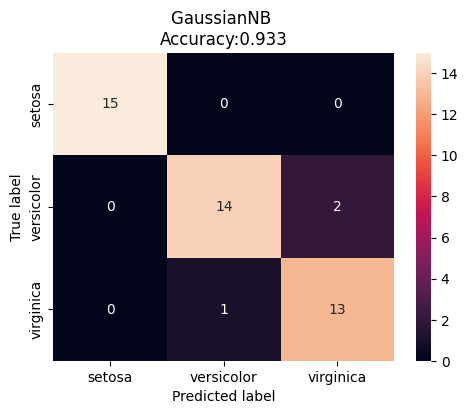

Nhãn dự đoán: [0]
Xác suất của mỗi nhãn: [[0.97515685 0.01325569 0.01158745]]


In [4]:
# Nạp các gói thư viện cần thiết
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu iris từ UCI (https://archive.ics.uci.edu/ml/datasets/Iris)
# hoặc từ thư viện scikit-learn
# Tham khảo https://scikitlearn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Đọc dữ liệu iris từ thư viện scikit-learn
iris = datasets.load_iris()
#print(iris)
columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"];
X = pd.DataFrame(iris.data, columns=columns)
y = iris.target
print(X.describe())
# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
# Xây dựng mô hình phân loại dữ liệu
model = GaussianNB()
model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
y_pred = model.predict(X_test)
#print(y_pred)
# Tính độ chính xác
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %
accuracy_score(y_test, y_pred))
# Xây dựng confusion-matrix. Tham khảo:
# https://www.python-course.eu/confusion_matrix.php
cm = confusion_matrix(y_test, y_pred)
# Chuyển confusion-matrix về data frame phục vụ cho việc vẽ đồ thị
cm_df = pd.DataFrame(cm,
 index=['setosa', 'versicolor', 'virginica'],
columns=['setosa', 'versicolor', 'virginica'])
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('GaussianNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load dữ liệu hoa iris từ scikit-learn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán nhãn và xác suất của bông hoa mới
new_flower = [[5.0, 3.5, 1.5, 0.2]]
new_flower_scaled = scaler.transform(new_flower)
predicted_label = svm_model.predict(new_flower_scaled)
predicted_proba = svm_model.predict_proba(new_flower_scaled)

# In kết quả
print("Nhãn dự đoán:", predicted_label)
print("Xác suất của mỗi nhãn:", predicted_proba)